In [40]:
import concepts
import numpy as np
import pandas as pd


from dateutil.parser import parse
from datetime import datetime


import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
data_1 = pd.read_excel(r"C:\Users\Samsung\jupyter\Project_LG_textmining\data\result\0502\data_origin.xlsx")
data_1.head()

,demo,sido,sigungu,period,맥주_amt,양주_amt,전통주_amt,와인_amt,소주_amt,맥주_cnt,양주_cnt,전통주_cnt,와인_cnt,소주_cnt
0,F20,강원도,강릉시,201805,488340,305500,38660,24080,256280,149,80,25,4,158
1,F20,강원도,강릉시,201808,2222000,70170,8210,131500,99900,628,14,5,15,60
2,F20,강원도,강릉시,201810,412380,18230,5280,36600,58620,109,5,3,5,35
3,F20,강원도,강릉시,201901,800440,4020,69200,60430,88510,240,2,36,6,50
4,F20,강원도,강릉시,201903,124870,682400,11830,13200,543000,38,104,6,3,348


In [3]:
def parsing_date(df_1,col_):
    df_ = df_1.copy()
    df_[col_] = df_[col_].map(lambda x : str(x))
    mon_ = [int(datetime.strptime(va,"%Y%m").month) for va in df_[col_]]
    year_ = [int(datetime.strptime(va,"%Y%m").year) for va in df_[col_]]
    df_["month"] = mon_
    df_["year"] =year_
    return df_

In [4]:
def hyperparmeter_period(df_,type_,date_):
    
    # tpye_ "year" = input [2017,2019]
    # type_ "month" = input [(2017,10),(2019,12)]

    df_1 = df_.copy()
    if type_ == "year":
        min_ = date_[0]
        max_ = date_[1]
        return df_1[df_1[type_] >= min_][df_1[type_] <= max_]
    elif type_ == "month":
        min_y = date_[0][0]
        min_m = date_[0][1]
        
        max_y = date_[1][0]
        max_m = date_[1][1]
        
        df_2 = df_1[df_1["year"] >= min_y][df_1["month"] >= min_m]
        df_3 = df_2[df_2["year"] <= max_y][df_2["month"] <=max_m]
        return df_3


In [5]:
def hyperparameter_district(df_1,type_,districts_):
    df_ = df_1.copy()
    return df_[df_[type_].map(lambda x: x in districts_)]

#data_3[data_3["sido"].map(lambda x :  x in [ "경기도" , "서울특별시"])]["sido"].value_counts()

In [6]:
def group_dataframe(df_1,col_list):
    df_ = df_1.copy()
    gro_all = pd.DataFrame()
    for pro_ in col_list:
        gro_1 = pd.DataFrame(df_.groupby("demo")[pro_].sum())
        gro_all = pd.concat([gro_all,gro_1],join="outer",axis=1)
    return gro_all

In [7]:
def simpify_colnames(df_):
    col_change = {}
    for i in df_.columns:
        col_change[i] = i.replace("_cnt","")

    return df_.rename(columns=col_change)

In [8]:
def quan_value(df_,quan_tar):
    quan_df = df_.quantile(quan_tar,axis=0).rename(index={0.25:1,0.5:2,0.75:3,1:4})
    return quan_df

In [9]:
def deter_quantile(test_value,tar_quan):
    quan_result = []
    for key_,value_ in tar_quan.items():
        if test_value > value_:
            quan_result.append(key_)

    if quan_result ==[]:
        return 1
    else:
        return max(quan_result) + 1

In [10]:
def quantile_output(df_1,df_qun):
    df_ = df_1.copy()
    for col_ in df_.columns:
        tests_ = df_[col_]
        tar_quan = df_qun[col_]
        df_["{}_q".format(col_)] = [deter_quantile(test,tar_quan) for test in tests_]
    return df_.drop(columns=df_1.columns)

In [20]:
#df_ = data_7.copy()

def make_container(df_1,col):
    df_ = df_1.copy()
    for col_ in col_list:
        for i in range(1,5):
            df_["{}_{}".format(col_,i)] = None
    return df_.drop(columns=df_1.columns)

In [21]:
def make_output(df_front1,df_back1):
    df_front = df_front1.copy()
    df_back = df_back1.copy()
    for row,col in df_front.iterrows():
        for key_ in col.keys():
            count_ = col[key_]
            name_ = key_.replace("q","{}")
            for i in range(count_):
                col_dack = name_.format(i+1)
                df_back.loc[row,col_dack] = 1
                #print(col_dack)
            #print("((()))")
            #print(count_)
    return df_back

In [22]:
data_2 = parsing_date(data_1,"period")
data_3 = hyperparmeter_period(data_2,"month",[(2018,2),(2019,11)])
data_4 = hyperparameter_district(data_3,"sido",["경기도","경상남도"])
col_list = ['맥주_cnt', '양주_cnt', '전통주_cnt', '와인_cnt', '소주_cnt']
data_5 = group_dataframe(data_4,col_list)
data_6 = simpify_colnames(data_5)
quan_tar = [0.25,0.5,0.75,1]
quantile_ = quan_value(data_6,quan_tar)
data_7 = quantile_output(data_6,quantile_)
col_list = [col_.replace("_q","") for col_ in data_7.columns]
data_8  = make_container(data_7,col_list)
out_ = make_output(data_7,data_8)

In [23]:
out_

,맥주_1,맥주_2,맥주_3,맥주_4,양주_1,양주_2,양주_3,양주_4,전통주_1,전통주_2,전통주_3,전통주_4,와인_1,와인_2,와인_3,와인_4,소주_1,소주_2,소주_3,소주_4
demo,,,,,,,,,,,,,,,,,,,,
F20,1,1,None,None,1,1,1,None,1,None,None,None,1,1,None,None,1,None,None,None
F30,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
F40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
F50,1,1,1,None,1,1,1,None,1,1,1,1,1,1,1,1,1,1,1,1
F60,1,None,None,None,1,None,None,None,1,1,None,None,1,None,None,None,1,1,None,None
M20,1,None,None,None,1,1,None,None,1,None,None,None,1,None,None,None,1,None,None,None
M30,1,1,1,None,1,1,1,1,1,1,None,None,1,1,1,None,1,1,1,None
M40,1,1,1,1,1,1,None,None,1,1,1,None,1,1,1,None,1,1,1,None
M50,1,1,None,None,1,None,None,None,1,1,1,None,1,1,None,None,1,1,None,None


In [24]:
out_.to_csv(r"C:\Users\Samsung\jupyter\Project_LG_textmining\data\result\0509\out_put.csv")

# FCA

In [25]:
CONTEXT =r'C:\Users\Samsung\jupyter\Project_LG_textmining\data\result\0509\out_put.csv'

cc = concepts.load_csv(CONTEXT)

In [26]:
print(cc)

<Context object mapping 10 objects to 20 properties [cc26b98f] at 0x1995482f108>
       |맥주_1|맥주_2|맥주_3|맥주_4|양주_1|양주_2|양주_3|양주_4|전통주_1|전통주_2|전통주_3|전통주_4|와인_1|와인_2|와인_3|와인_4|소주_1|소주_2|소주_3|소주_4|
    F20|X   |X   |    |    |X   |X   |X   |    |X    |     |     |     |X   |X   |    |    |X   |    |    |    |
    F30|X   |X   |X   |X   |X   |X   |X   |X   |X    |X    |X    |X    |X   |X   |X   |X   |X   |X   |X   |X   |
    F40|X   |X   |X   |X   |X   |X   |X   |X   |X    |X    |X    |X    |X   |X   |X   |X   |X   |X   |X   |X   |
    F50|X   |X   |X   |    |X   |X   |X   |    |X    |X    |X    |X    |X   |X   |X   |X   |X   |X   |X   |X   |
    F60|X   |    |    |    |X   |    |    |    |X    |X    |     |     |X   |    |    |    |X   |X   |    |    |
    M20|X   |    |    |    |X   |X   |    |    |X    |     |     |     |X   |    |    |    |X   |    |    |    |
    M30|X   |X   |X   |    |X   |X   |X   |X   |X    |X    |     |     |X   |X   |X   |    |X   |X   |X   |    |
    M40|X   |X 

In [27]:
test_ = [re_ for re_ in cc.lattice]
test_

[<Infimum {F30, F40} <-> [맥주_1 맥주_2 맥주_3 맥주_4 양주_1 양주_2 양주_3 양주_4 전통주_1 전통주_2 전통주_3 전통주_4 와인_1 와인_2 와인_3 와인_4 소주_1 소주_2 소주_3 소주_4] <=> F30 F40>,
 <Atom {F30, F40, F50} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 전통주_1 전통주_2 전통주_3 전통주_4 와인_1 와인_2 와인_3 와인_4 소주_1 소주_2 소주_3 소주_4] <=> F50 <=> 전통주_4 와인_4 소주_4>,
 <Atom {F30, F40, M30} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 양주_4 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> M30 <=> 양주_4>,
 <Atom {F30, F40, M40} <-> [맥주_1 맥주_2 맥주_3 맥주_4 양주_1 양주_2 전통주_1 전통주_2 전통주_3 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> M40 <=> 맥주_4>,
 <Concept {F30, F40, F50, M30} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3]>,
 <Concept {F30, F40, F50, M40} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 전통주_1 전통주_2 전통주_3 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3]>,
 <Concept {F20, F30, F40, F50, M30} <-> [맥주_1 맥주_2 양주_1 양주_2 양주_3 전통주_1 와인_1 와인_2 소주_1] <=> F20 <=> 양주_3>,
 <Concept {F30, F40, F50, M30, M40} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> 맥주_3 와인_

In [28]:
for concept in cc.lattice:
    print(concept)

{F30, F40} <-> [맥주_1 맥주_2 맥주_3 맥주_4 양주_1 양주_2 양주_3 양주_4 전통주_1 전통주_2 전통주_3 전통주_4 와인_1 와인_2 와인_3 와인_4 소주_1 소주_2 소주_3 소주_4] <=> F30 F40
{F30, F40, F50} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 전통주_1 전통주_2 전통주_3 전통주_4 와인_1 와인_2 와인_3 와인_4 소주_1 소주_2 소주_3 소주_4] <=> F50 <=> 전통주_4 와인_4 소주_4
{F30, F40, M30} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 양주_4 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> M30 <=> 양주_4
{F30, F40, M40} <-> [맥주_1 맥주_2 맥주_3 맥주_4 양주_1 양주_2 전통주_1 전통주_2 전통주_3 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> M40 <=> 맥주_4
{F30, F40, F50, M30} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3]
{F30, F40, F50, M40} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 전통주_1 전통주_2 전통주_3 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3]
{F20, F30, F40, F50, M30} <-> [맥주_1 맥주_2 양주_1 양주_2 양주_3 전통주_1 와인_1 와인_2 소주_1] <=> F20 <=> 양주_3
{F30, F40, F50, M30, M40} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> 맥주_3 와인_3 소주_3
{F30, F40, F50, M40, M50} <-> [맥주_1 맥주_2 양주_1 전통주_1 전통주_2 전통주_3 와인_1 와인_2 소주_1

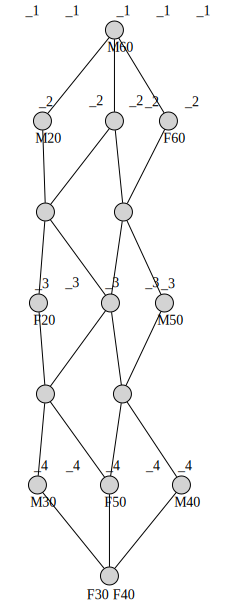

In [29]:
cc.lattice.graphviz()

# Concept

In [30]:
con_list = []
for concept in cc.lattice:
    con_list.append(concept)

In [69]:
ex_test = con_list[1].extent
ex_test

('F30', 'F40', 'F50')

In [70]:
in_test = con_list[1].intent
in_test

('맥주_1',
 '맥주_2',
 '맥주_3',
 '양주_1',
 '양주_2',
 '양주_3',
 '전통주_1',
 '전통주_2',
 '전통주_3',
 '전통주_4',
 '와인_1',
 '와인_2',
 '와인_3',
 '와인_4',
 '소주_1',
 '소주_2',
 '소주_3',
 '소주_4')

In [71]:
count_dic = {}
for it in in_test:
    name_,num_ = it.split("_")
    try:
        if count_dic[name_] < num_:
            count_dic[name_] = num_
        else:
            pass
    except:
        count_dic[name_] = num_
count_dic

{'맥주': '3', '양주': '3', '전통주': '4', '와인': '4', '소주': '4'}

In [80]:
gra_name = "Group "+", ".join([ex_ for ex_ in ex_test])
gra_name

'Group F30, F40, F50'

In [81]:
name_x = [key_ for key_ in count_dic.keys()]
name_x

['맥주', '양주', '전통주', '와인', '소주']

In [82]:
num_y = [int(value_) for value_ in count_dic.values()]
num_y

[3, 3, 4, 4, 4]

In [91]:


fig = go.Figure([go.Bar(x=name_x, y=num_y)])
fig.update_yaxes(range=[0,5])
fig.update_layout(
    title_text=gra_name,
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
    plot_bgcolor='white',
    legend_title_font_color="green",
    font=dict(
        family="Times New Roman",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [87]:
def make_concept(cc):
    display(cc.lattice.graphviz())
    con_list = []
    for concept in cc.lattice:
        con_list.append(concept)
    
    return con_list

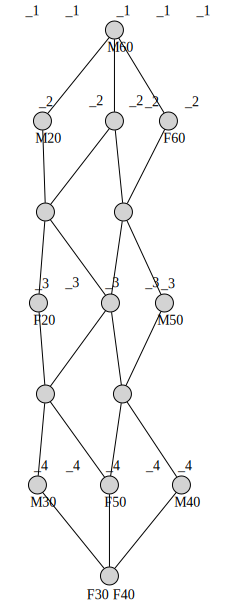

[<Infimum {F30, F40} <-> [맥주_1 맥주_2 맥주_3 맥주_4 양주_1 양주_2 양주_3 양주_4 전통주_1 전통주_2 전통주_3 전통주_4 와인_1 와인_2 와인_3 와인_4 소주_1 소주_2 소주_3 소주_4] <=> F30 F40>,
 <Atom {F30, F40, F50} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 전통주_1 전통주_2 전통주_3 전통주_4 와인_1 와인_2 와인_3 와인_4 소주_1 소주_2 소주_3 소주_4] <=> F50 <=> 전통주_4 와인_4 소주_4>,
 <Atom {F30, F40, M30} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 양주_4 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> M30 <=> 양주_4>,
 <Atom {F30, F40, M40} <-> [맥주_1 맥주_2 맥주_3 맥주_4 양주_1 양주_2 전통주_1 전통주_2 전통주_3 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> M40 <=> 맥주_4>,
 <Concept {F30, F40, F50, M30} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 양주_3 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3]>,
 <Concept {F30, F40, F50, M40} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 전통주_1 전통주_2 전통주_3 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3]>,
 <Concept {F20, F30, F40, F50, M30} <-> [맥주_1 맥주_2 양주_1 양주_2 양주_3 전통주_1 와인_1 와인_2 소주_1] <=> F20 <=> 양주_3>,
 <Concept {F30, F40, F50, M30, M40} <-> [맥주_1 맥주_2 맥주_3 양주_1 양주_2 전통주_1 전통주_2 와인_1 와인_2 와인_3 소주_1 소주_2 소주_3] <=> 맥주_3 와인_

In [88]:
make_concept(cc)

In [93]:
def make_graph(con_list,target_num):
    ex_test = con_list[target_num].extent
    in_test = con_list[target_num].intent
    count_dic = {}
    for it in in_test:
        name_,num_ = it.split("_")
        try:
            if count_dic[name_] < num_:
                count_dic[name_] = num_
            else:
                pass
        except:
            count_dic[name_] = num_
    num_y = [int(value_) for value_ in count_dic.values()]
    gra_name = "Group "+", ".join([ex_ for ex_ in ex_test])
    name_x = [key_ for key_ in count_dic.keys()]
    fig = go.Figure([go.Bar(x=name_x, y=num_y)])
    fig.update_yaxes(range=[0,5])
    fig.update_layout(
        title_text=gra_name,
        barmode="stack",
        uniformtext=dict(mode="hide", minsize=10),
        plot_bgcolor='white',
        legend_title_font_color="green",
        font=dict(
            family="Times New Roman",
            size=18,
            color="RebeccaPurple"
        )
    )
    fig.show()

In [94]:
make_graph(con_list,2)